# Data Preprocessing

## Setup

In [16]:
# make the current working directory the project root directory
import os
PROJECT_ROOT_DIRECTORY = 'senior_project'
while os.path.basename(os.getcwd()) != PROJECT_ROOT_DIRECTORY:
    os.chdir(os.pardir)
print('Current working directory:', os.getcwd())

Current working directory: c:\Users\pavan\Desktop\senior_project


In [17]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import yfinance as yf
import talib as ta
from tqdm.notebook import tqdm

## Download data

In [18]:
TICKERS = ['AXP', 'AAPL', 'BA', 'GS', 'INTC', 'JNJ', 'KO', 'NKE', 'PG', 'DIS']

# 9 years of pre COVID-19 data
TRAIN_START = '2010-01-01'
TRAIN_END = '2019-12-31'

# 1 year of heavily COVID-19 affected data and 1 year of post COVID-19 growth
VAL_START = '2020-01-01'
VAL_END = '2021-12-31'

# 1 year of recession period
TEST_START = '2022-01-01'
TEST_END = '2022-12-31'

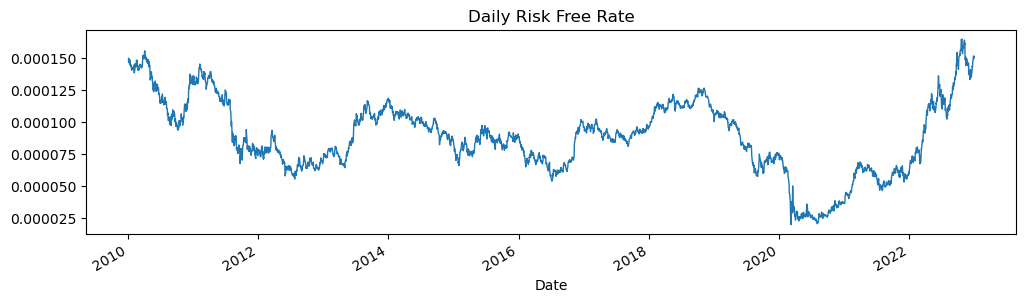

In [19]:
yearly_risk_free_rate_percentage = yf.download('^TNX', start = TRAIN_START, end = TEST_END, interval = '1d', progress=False)['Close']
risk_free_rate = (1+yearly_risk_free_rate_percentage/100)**(1/252)-1 # daily risk free rate
risk_free_rate.plot(title='Daily Risk Free Rate', figsize=(12,3), legend=False, lw=1);

In [20]:
data = {}
for ticker in tqdm(TICKERS):
    data[ticker] = yf.download(
        ticker,
        start = TRAIN_START,
        end = TEST_END,
        interval = '1d',
        progress = False
    )

  0%|          | 0/10 [00:00<?, ?it/s]

## Combine and fill `NaN` values

In [21]:
df = pd.DataFrame(index=pd.date_range(start=TRAIN_START, end=TEST_END, freq='d')) # Create a dataframe with a full index
df['RF_RETURN'] = risk_free_rate
for ticker in TICKERS:
    df[f'{ticker}_RETURN'] = data[ticker]['Adj Close'].pct_change(1) # Fill in each return column
print(f'Number of all NaN rows dropped: {df.isna().all(axis=1).sum()}')
df.dropna(axis=0, how='all', inplace=True) # Drop rows with all NaN e.g first row, weekends, public holidays

Number of all NaN rows dropped: 1476


In [22]:
# Fill `NaN values`
print(df.isna().sum())
df.fillna(value=0, inplace=True) # Replace any remaining NaN values with 0 return

RF_RETURN      3
AXP_RETURN     1
AAPL_RETURN    1
BA_RETURN      1
GS_RETURN      1
INTC_RETURN    1
JNJ_RETURN     1
KO_RETURN      1
NKE_RETURN     1
PG_RETURN      1
DIS_RETURN     1
dtype: int64


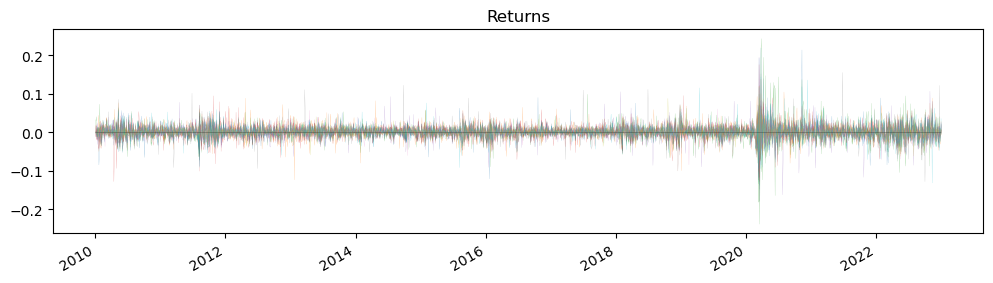

In [23]:
df[[f'{ticker}_RETURN' for ticker in TICKERS]].plot(title='Returns', figsize=(12,3), legend=False, lw=0.1, alpha=0.8);
df['RF_RETURN'].plot(color='black', lw=0.2, alpha=0.8); # This line is just above 0 and moves ever so slightly

In [24]:
df.describe()

,RF_RETURN,AXP_RETURN,AAPL_RETURN,BA_RETURN,GS_RETURN,INTC_RETURN,JNJ_RETURN,KO_RETURN,NKE_RETURN,PG_RETURN,DIS_RETURN
count,3272.000000,3272.000000,3272.000000,3272.000000,3272.000000,3272.000000,3272.000000,3272.000000,3272.000000,3272.000000,3272.000000
mean,0.000088,0.000622,0.001079,0.000714,0.000441,0.000367,0.000479,0.000429,0.000800,0.000456,0.000482
std,0.000029,0.018592,0.018087,0.022964,0.018350,0.018601,0.010602,0.011052,0.017391,0.010958,0.016421
min,0.000000,-0.148187,-0.128647,-0.238484,-0.127910,-0.180415,-0.100379,-0.096725,-0.128081,-0.087373,-0.131632
25%,0.000069,-0.007097,-0.007577,-0.009032,-0.008692,-0.008476,-0.004343,-0.004556,-0.007383,-0.004602,-0.006724
50%,0.000088,0.000690,0.000892,0.000702,0.000399,0.000467,0.000339,0.000633,0.000652,0.000553,0.000450
75%,0.000108,0.009117,0.010653,0.010372,0.009857,0.009435,0.005776,0.005938,0.009294,0.005876,0.008050
max,0.000165,0.218823,0.119808,0.243186,0.175803,0.195213,0.079977,0.064796,0.155314,0.120090,0.144123


## Train-Val-Test Split

In [25]:
train_df = df[TRAIN_START : TRAIN_END]
val_df = df[VAL_START : VAL_END]
test_df = df[TEST_START : TEST_END]

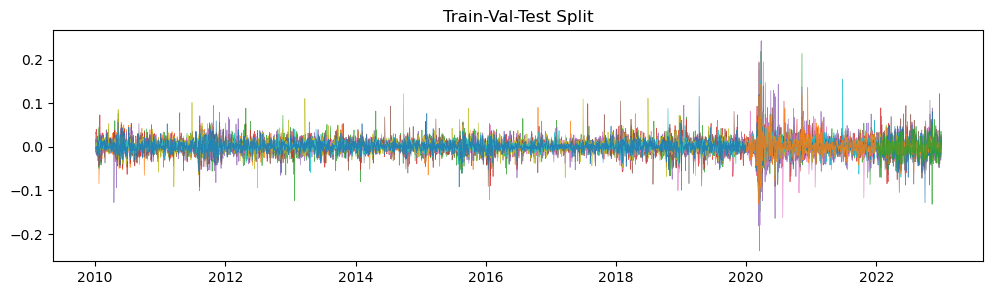

In [26]:
plt.figure(figsize=(12,3));
plt.title('Train-Val-Test Split')
plt.plot(train_df, alpha=0.8, lw=0.5);
plt.plot(val_df, alpha=0.8, lw=0.5);
plt.plot(test_df, alpha=0.8, lw=0.5);

In [27]:
df.to_csv('data/dow_10_returns.csv')
train_df.to_csv('data/dow_10_returns_train.csv')
val_df.to_csv('data/dow_10_returns_val.csv')
test_df.to_csv('data/dow_10_returns_test.csv')